In [ ]:
# imported libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import kruskal
from scipy.stats import wilcoxon
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import seaborn as sns
import numpy as np

In [ ]:
# function to add a column for class standing
def map_class_standing(val):
    responses = str(val).split(",")

    if "3" in responses:
        return "Sophomore"
    elif "4" in responses:
        return "Junior"
    elif "5" in responses:
        return "Senior"
    else:
        return None


In [ ]:
# function to find the average
def average_list(values):
    total = 0
    for i in range(0, len(values)):
        total += values[i]
    return total / len(values)

In [ ]:
# function to graph a single value beginning to end
def lineplot_beg_to_end(q, begOverall, endOverall, band_factor=1):

    # --- compute averages ---
    overallAvgBEG = np.mean(begOverall)
    overallAvgEND = np.mean(endOverall)

    # --- compute standard deviations ---
    overallSTD_BE = np.std(begOverall, ddof=1)
    overallSTD_END= np.std(endOverall, ddof=1)

    # --- dataframe for plotting ---
    dfo = pd.DataFrame({"x": [0, 1], "y": [overallAvgBEG, overallAvgEND]})
    sd_overall = np.asarray([overallSTD_BE, overallSTD_END], dtype=float)

    # --- plot ---
    plt.figure(figsize=(6,4))
    sns.lineplot(data=dfo, x="x", y="y", marker="o", color="black")

    x_o, y_o = dfo["x"].to_numpy(dtype=float), dfo["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overall, y_o + band_factor*sd_overall,
                     alpha=0.2, color="gray")

    plt.xticks([0, 1], ["Beginning", "End"])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End (Overall)")
    plt.tight_layout()
    plt.show()

In [ ]:
# function to create graphs for beginning vs end
def lineplot_overall_separate(q, begOverall, endOverall, band_factor=1):

    # --- compute averages & std ---
    avg_beg = np.mean(begOverall)
    avg_end = np.mean(endOverall)
    std_beg = np.std(begOverall, ddof=1)
    std_end = np.std(endOverall, ddof=1)

    # --- x-axis points ---
    x = np.linspace(0, 1, 50)  # span entire axis

    plt.figure(figsize=(6,4))

    # Beginning line + shaded region
    plt.plot(x, [avg_beg]*len(x), color="blue", label="Beginning")
    plt.fill_between(x,
                     [avg_beg - band_factor*std_beg]*len(x),
                     [avg_beg + band_factor*std_beg]*len(x),
                     alpha=0.2, color="blue")

    # End line + shaded region
    plt.plot(x, [avg_end]*len(x), color="red", label="End")
    plt.fill_between(x,
                     [avg_end - band_factor*std_end]*len(x),
                     [avg_end + band_factor*std_end]*len(x),
                     alpha=0.2, color="red")

    # Formatting
    plt.xticks([])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to use Kruskal-Wallis test
def kruskalTest(data1, data2, *args):
    h_stat, p_value = kruskal(data1, data2, *args)

    print(f"Kruskal-Wallis H-Statistic: {h_stat}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists \n")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists \n")

In [ ]:
# function to use Mann whitney test
def UTest(data1, data2):
    u_value, p_value = mannwhitneyu(data1, data2)

    print(f"Mann-Whitney U-Value: {u_value}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists\n")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists\n")

In [ ]:
# reads file
data = pd.read_excel('updateDataset.xlsx', header = 1)

In [ ]:
# calls function to create new column for class standing
data["Class Standing Label"] = data["Q27"].apply(map_class_standing)

In [ ]:
# drop data and include only double responses
data.drop(data.tail(37).index, inplace=True)

In [ ]:
# drops empty first row
data = data.drop(index=0)

In [ ]:
# prints first five rows
data.head()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Class Standing Label
1,2022-12-01 17:33:00,2022-12-01 17:36:48,End,Student 1,4.0,NaN,male,5,5.0,5.0,...,3.0,2.0,4.0,4.0,3.0,4.0,3.0,NaN,NaN,Senior
2,2022-10-05 11:22:17,2022-10-05 11:25:34,Beginning,Student 1,8.0,NaN,Male,5,5.0,5.0,...,3.0,3.0,3.0,3.0,3.0,5.0,3.0,NaN,NaN,Senior
3,2022-12-03 16:03:10,2022-12-03 16:07:19,End,Student 2,9.0,middle eastern,male,5,NaN,NaN,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,NaN,NaN,Senior
4,2022-10-05 11:33:24,2022-10-05 11:42:06,Beginning,Student 2,9.0,Middle Eastern,Man,5,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,Senior
5,2022-11-30 07:26:53,2022-11-30 07:28:56,End,Student 3,7.0,NaN,Male,"5,6",NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,Senior


In [ ]:
# prints last five rows
data.tail()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Class Standing Label
100,2022-12-04 14:02:00,2022-12-04 14:04:24,End,Student 50,3.0,NaN,Male,"5,2",3.0,5.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,Senior
101,2022-10-24 19:29:01,2022-10-24 19:34:44,Beginning,Student 51,4.0,NaN,Male,3,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sophomore
102,2022-11-29 23:11:07,2022-11-29 23:14:29,End,Student 51,4.0,NaN,Male,3,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,Sophomore
103,2022-12-02 10:44:29,2022-12-02 10:46:41,End,Student 52,7.0,NaN,Male,5,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,Senior
104,2022-10-05 13:14:23,2022-10-05 13:34:31,Beginning,Student 52,7.0,NaN,Male,5,4.0,3.0,...,3.0,2.0,4.0,1.0,1.0,4.0,1.0,NaN,NaN,Senior


In [ ]:
# describes data
data.describe()

,EndDate,Q23,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,...,Q26_5,Q26_6,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14
count,104,104.000000,82.000000,83.000000,83.000000,83.000000,83.000000,82.000000,83.000000,82.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,25.000000
mean,2022-11-05 08:03:24.086538496,5.509615,3.926829,4.289157,4.168675,4.120482,4.192771,4.219512,4.228916,4.268293,...,4.653846,3.653846,3.846154,3.141026,3.987179,3.397436,3.064103,4.692308,3.051282,3.080000
min,2022-10-05 11:25:34,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,2022-10-06 14:10:39.500000,4.000000,3.000000,4.000000,4.000000,3.500000,4.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,5.000000,3.000000,3.000000
50%,2022-11-11 21:26:03.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,2022-11-30 11:42:51,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,4.750000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,2022-12-10 00:45:04,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,NaN,2.220798,0.991077,0.773496,0.921548,0.942203,0.772355,0.861013,0.860024,0.737844,...,0.577206,1.102853,0.838628,0.935926,0.860287,1.085198,1.036224,0.587924,0.952065,1.037625


In [ ]:
# START OF QUESTION 3

In [ ]:
# Q3_1
# mean for Q3_1
Q3_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_1"].mean()
print("Q3_1 Mean", Q3_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()
senior_beg_Q3_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()
sophomore_beg_Q3_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()

junior_end_Q3_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_1"].dropna()
senior_end_Q3_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_1"].dropna()
sophomore_end_Q3_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_1, senior_beg_Q3_1, sophomore_end_Q3_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_1, senior_end_Q3_1, sophomore_end_Q3_1)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_1, junior_end_Q3_1)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_1, senior_end_Q3_1)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_1, sophomore_end_Q3_1)


Q3_1 Mean Class Standing Label  B/E?     
Junior                Beginning    4.500000
                      End          3.666667
Senior                Beginning    4.040000
                      End          3.700000
Sophomore             Beginning    3.700000
                      End          3.888889
Name: Q3_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.2880548904291849
P-value: 0.5251730533824954
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.18387439762652838
P-value: 0.9121624326296137
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 18.0
P-value: 0.20462644184356282
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 287.0
P-value: 0.3814279580804749
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 38.5
P-value: 0.583676047

In [ ]:
# Q3_2
# mean for Q3_2
Q3_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_2"].mean()
print("Q3_2 Mean", Q3_2_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()
senior_beg_Q3_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()
sophomore_beg_Q3_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()

junior_end_Q3_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_2"].dropna()
senior_end_Q3_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_2"].dropna()
sophomore_end_Q3_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_2, senior_beg_Q3_2, sophomore_end_Q3_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_2, senior_end_Q3_2, sophomore_end_Q3_2)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_2, junior_end_Q3_2)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_2, senior_end_Q3_2)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_2, sophomore_end_Q3_2)


Q3_2 Mean Class Standing Label  B/E?     
Junior                Beginning    4.250000
                      End          4.000000
Senior                Beginning    4.240000
                      End          4.238095
Sophomore             Beginning    4.500000
                      End          4.333333
Name: Q3_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.10130193985308461
P-value: 0.9506104042557634
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.36068583362808704
P-value: 0.8349838323164193
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 13.5
P-value: 0.8200898511292445
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 252.0
P-value: 0.8114717983166231
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 50.0
P-value: 0.679224601

In [ ]:
# Q3_3
# mean for Q3_3
Q3_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_3"].mean()
print("Q3_3 Mean", Q3_3_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()
senior_beg_Q3_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()
sophomore_beg_Q3_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()

junior_end_Q3_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_3"].dropna()
senior_end_Q3_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_3"].dropna()
sophomore_end_Q3_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_3, senior_beg_Q3_3, sophomore_end_Q3_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_3, senior_end_Q3_3, sophomore_end_Q3_3)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_3, junior_end_Q3_3)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_3, senior_end_Q3_3)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_3, sophomore_end_Q3_3)


Q3_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.750000
                      End          3.833333
Senior                Beginning    4.080000
                      End          4.047619
Sophomore             Beginning    4.400000
                      End          4.111111
Name: Q3_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.1912952005259676
P-value: 0.33432302914665923
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.1703610512021703
P-value: 0.9183464843852358
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 18.0
P-value: 0.20462644184356282
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 283.5
P-value: 0.6307690829455268
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 55.0
P-value: 0.401614426

In [ ]:
# Q3_4
# mean for Q3_4
Q3_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_4"].mean()
print("Q3_4 Mean", Q3_4_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()
senior_beg_Q3_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()
sophomore_beg_Q3_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()

junior_end_Q3_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_4"].dropna()
senior_end_Q3_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_4"].dropna()
sophomore_end_Q3_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_4, senior_beg_Q3_4, sophomore_end_Q3_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_4, senior_end_Q3_4, sophomore_end_Q3_4)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_4, junior_end_Q3_4)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_4, senior_end_Q3_4)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_4, sophomore_end_Q3_4)


Q3_4 Mean Class Standing Label  B/E?     
Junior                Beginning    4.750000
                      End          4.166667
Senior                Beginning    4.160000
                      End          4.095238
Sophomore             Beginning    3.900000
                      End          3.888889
Name: Q3_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.3559390676445195
P-value: 0.3079032915392328
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.2565892966066315
P-value: 0.8795941700289507
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 17.5
P-value: 0.23859282931643555
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 289.0
P-value: 0.5401443516926557
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 45.5
P-value: 1.0
Fail to 

In [ ]:
# Q3_5
# mean for Q3_5
Q3_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_5"].mean()
print("Q3_5 Mean", Q3_5_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()
senior_beg_Q3_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()
sophomore_beg_Q3_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()

junior_end_Q3_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_5"].dropna()
senior_end_Q3_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_5"].dropna()
sophomore_end_Q3_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_5, senior_beg_Q3_5, sophomore_end_Q3_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_5, senior_end_Q3_5, sophomore_end_Q3_5)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_5, junior_end_Q3_5)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_5, senior_end_Q3_5)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_5, sophomore_end_Q3_5)


Q3_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.750000
                      End          4.333333
Senior                Beginning    4.120000
                      End          4.095238
Sophomore             Beginning    4.200000
                      End          4.111111
Name: Q3_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.190977475952717
P-value: 0.33437614468645704
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.582841802782821
P-value: 0.7472011138340074
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.5
P-value: 0.46421431277103153
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 281.0
P-value: 0.6685441801398574
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 47.5
P-value: 0.85698119923

In [ ]:
# Q3_6
# mean for Q3_6
Q3_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_6"].mean()
print("Q3_6 Mean", Q3_6_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()
senior_beg_Q3_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()
sophomore_beg_Q3_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()

junior_end_Q3_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_6"].dropna()
senior_end_Q3_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_6"].dropna()
sophomore_end_Q3_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_6, senior_beg_Q3_6, sophomore_end_Q3_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_6, senior_end_Q3_6, sophomore_end_Q3_6)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_6, junior_end_Q3_6)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_6, senior_end_Q3_6)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_6, sophomore_end_Q3_6)


Q3_6 Mean Class Standing Label  B/E?     
Junior                Beginning    4.500000
                      End          3.833333
Senior                Beginning    4.200000
                      End          4.050000
Sophomore             Beginning    4.600000
                      End          4.222222
Name: Q3_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.4725424196440993
P-value: 0.7895665067002084
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.34060931899643115
P-value: 0.843407825246113
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 16.0
P-value: 0.42603032322737455
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 277.5
P-value: 0.5059530841769535
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 59.0
P-value: 0.2147667145

In [ ]:
# Q3_7
# mean for Q3_7
Q3_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_7"].mean()
print("Q3_7 Mean", Q3_7_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()
senior_beg_Q3_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()
sophomore_beg_Q3_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()

junior_end_Q3_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_7"].dropna()
senior_end_Q3_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_7"].dropna()
sophomore_end_Q3_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_7, senior_beg_Q3_7, sophomore_end_Q3_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_7, senior_end_Q3_7, sophomore_end_Q3_7)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_7, junior_end_Q3_7)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_7, senior_end_Q3_7)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_7, sophomore_end_Q3_7)


Q3_7 Mean Class Standing Label  B/E?     
Junior                Beginning    4.250000
                      End          3.833333
Senior                Beginning    4.280000
                      End          4.190476
Sophomore             Beginning    4.400000
                      End          4.000000
Name: Q3_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.9133721494420215
P-value: 0.38416386919763335
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.1589355823760303
P-value: 0.5601964287185208
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.5
P-value: 0.4980057317354828
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 289.5
P-value: 0.5225586735647898
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 59.0
P-value: 0.2296847585

In [ ]:
# Q3_8
# mean for Q3_8
Q3_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_8"].mean()
print("Q3_8 Mean", Q3_8_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()
senior_beg_Q3_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()
sophomore_beg_Q3_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()

junior_end_Q3_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_8"].dropna()
senior_end_Q3_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_8"].dropna()
sophomore_end_Q3_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_8, senior_beg_Q3_8, sophomore_end_Q3_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_8, senior_end_Q3_8, sophomore_end_Q3_8)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_8, junior_end_Q3_8)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_8, senior_end_Q3_8)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_8, sophomore_end_Q3_8)


Q3_8 Mean Class Standing Label  B/E?     
Junior                Beginning    4.25
                      End          4.00
Senior                Beginning    4.44
                      End          4.00
Sophomore             Beginning    4.50
                      End          4.00
Name: Q3_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.070846790890279
P-value: 0.2153644875204387
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.025987048068842552
P-value: 0.9870905273638676
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 14.5
P-value: 0.5981614526835282
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 315.5
P-value: 0.10679560321320113
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 62.5
P-value: 0.13198433756529632
Fail to reject 

In [ ]:
# Q3_9
# mean for Q3_9
Q3_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_9"].mean()
print("Q3_9 Mean", Q3_9_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()
senior_beg_Q3_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()
sophomore_beg_Q3_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()

junior_end_Q3_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_9"].dropna()
senior_end_Q3_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_9"].dropna()
sophomore_end_Q3_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_9, senior_beg_Q3_9, sophomore_end_Q3_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_9, senior_end_Q3_9, sophomore_end_Q3_9)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_9, junior_end_Q3_9)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_9, senior_end_Q3_9)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_9, sophomore_end_Q3_9)


Q3_9 Mean Class Standing Label  B/E?     
Junior                Beginning    4.750000
                      End          3.666667
Senior                Beginning    4.040000
                      End          3.809524
Sophomore             Beginning    3.900000
                      End          4.000000
Name: Q3_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.7212393162393176
P-value: 0.2565017842847552
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.5645563310069731
P-value: 0.7540639007925167
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.5
P-value: 0.07075981480305736
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 286.0
P-value: 0.593114238911155
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 42.0
P-value: 0.82864855662

In [ ]:
# Q3_10
# mean for Q3_10
Q3_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_10"].mean()
print("Q3_10 Mean", Q3_10_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()
senior_beg_Q3_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()
sophomore_beg_Q3_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()

junior_end_Q3_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_10"].dropna()
senior_end_Q3_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_10"].dropna()
sophomore_end_Q3_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_10, senior_beg_Q3_10, sophomore_end_Q3_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_10, senior_end_Q3_10, sophomore_end_Q3_10)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_10, junior_end_Q3_10)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_10, senior_end_Q3_10)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_10, sophomore_end_Q3_10)


Q3_10 Mean Class Standing Label  B/E?     
Junior                Beginning    4.500000
                      End          4.333333
Senior                Beginning    4.280000
                      End          4.142857
Sophomore             Beginning    4.400000
                      End          4.333333
Name: Q3_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.7036265286923933
P-value: 0.7034114617122492
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.3817983481377611
P-value: 0.8262158879379411
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.0
P-value: 0.5556897902827946
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 306.0
P-value: 0.30448856068851304
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 49.5
P-value: 0.71180991

In [ ]:
# Q3_11
# mean for Q3_11
Q3_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_11"].mean()
print("Q3_11 Mean", Q3_11_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()
senior_beg_Q3_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()
sophomore_beg_Q3_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()

junior_end_Q3_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_11"].dropna()
senior_end_Q3_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_11"].dropna()
sophomore_end_Q3_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_11, senior_beg_Q3_11, sophomore_end_Q3_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_11, senior_end_Q3_11, sophomore_end_Q3_11)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q3_11, junior_end_Q3_11)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q3_11, senior_end_Q3_11)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_11, sophomore_end_Q3_11)


Q3_11 Mean Class Standing Label  B/E?     
Junior                Beginning    4.500000
                      End          4.333333
Senior                Beginning    3.960000
                      End          3.857143
Sophomore             Beginning    3.900000
                      End          3.777778
Name: Q3_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.7196222749538699
P-value: 0.4232420093236512
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.3325368379131834
P-value: 0.5136216269442611
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 14.0
P-value: 0.7076604666545524
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 277.5
P-value: 0.7367342049601757
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 48.5
P-value: 0.789525401

In [ ]:
# START OF QUESTION 6

In [ ]:
# Q6_1
# mean for Q6_1
Q6_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_1"].mean()
print("Q6_1 Mean", Q6_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()
senior_beg_Q6_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()
sophomore_beg_Q6_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()

junior_end_Q6_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_1"].dropna()
senior_end_Q6_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_1"].dropna()
sophomore_end_Q6_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_1, senior_beg_Q6_1, sophomore_end_Q6_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_1, senior_end_Q6_1, sophomore_end_Q6_1)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_1, junior_end_Q6_1)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_1, senior_end_Q6_1)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_1, sophomore_end_Q6_1)


Q6_1 Mean Class Standing Label  B/E?     
Junior                Beginning    2.333333
                      End          3.166667
Senior                Beginning    3.360000
                      End          3.321429
Sophomore             Beginning    2.750000
                      End          3.375000
Name: Q6_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.782188791382284
P-value: 0.24880286679609767
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.26915129666892346
P-value: 0.8740867531684016
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 2.5
P-value: 0.0640775064510595
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 356.0
P-value: 0.9185601155167019
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 20.0
P-value: 0.16437826879

In [ ]:
# Q6_2
# mean for Q6_2
Q6_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_2"].mean()
print("Q6_2 Mean", Q6_2_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()
senior_beg_Q6_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()
sophomore_beg_Q6_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()

junior_end_Q6_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_2"].dropna()
senior_end_Q6_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_2"].dropna()
sophomore_end_Q6_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_2, senior_beg_Q6_2, sophomore_end_Q6_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_2, senior_end_Q6_2, sophomore_end_Q6_2)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_2, junior_end_Q6_2)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_2, senior_end_Q6_2)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_2, sophomore_end_Q6_2)


Q6_2 Mean Class Standing Label  B/E?     
Junior                Beginning    4.333333
                      End          4.000000
Senior                Beginning    4.160000
                      End          4.107143
Sophomore             Beginning    3.750000
                      End          4.375000
Name: Q6_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.28408621033228537
P-value: 0.8675838583335369
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.9337258294590173
P-value: 0.6269660323296877
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 11.0
P-value: 0.6788452994243183
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 370.5
P-value: 0.7041106388506717
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 17.5
P-value: 0.1156880222

In [ ]:
# Q6_3
# mean for Q6_3
Q6_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_3"].mean()
print("Q6_3 Mean", Q6_3_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()
senior_beg_Q6_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()
sophomore_beg_Q6_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()

junior_end_Q6_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_3"].dropna()
senior_end_Q6_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_3"].dropna()
sophomore_end_Q6_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_3, senior_beg_Q6_3, sophomore_end_Q6_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_3, senior_end_Q6_3, sophomore_end_Q6_3)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_3, junior_end_Q6_3)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_3, senior_end_Q6_3)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_3, sophomore_end_Q6_3)


Q6_3 Mean Class Standing Label  B/E?     
Junior                Beginning    2.666667
                      End          3.500000
Senior                Beginning    3.480000
                      End          3.607143
Sophomore             Beginning    2.500000
                      End          3.625000
Name: Q6_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.8785461123375002
P-value: 0.23710005447184088
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.10476419351039326
P-value: 0.9489662006544537
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 3.0
P-value: 0.11235119769046385
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 325.0
P-value: 0.6381528672453102
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 11.0
P-value: 0.023019828

In [ ]:
# Q6_4
# mean for Q6_4
Q6_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_4"].mean()
print("Q6_4 Mean", Q6_4_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()
senior_beg_Q6_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()
sophomore_beg_Q6_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()

junior_end_Q6_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_4"].dropna()
senior_end_Q6_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_4"].dropna()
sophomore_end_Q6_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_4, senior_beg_Q6_4, sophomore_end_Q6_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_4, senior_end_Q6_4, sophomore_end_Q6_4)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_4, junior_end_Q6_4)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_4, senior_end_Q6_4)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_4, sophomore_end_Q6_4)


Q6_4 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          3.666667
Senior                Beginning    4.240000
                      End          4.178571
Sophomore             Beginning    4.625000
                      End          4.250000
Name: Q6_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.3998119452384562
P-value: 0.8188077398056246
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 2.082820197044329
P-value: 0.35295662726971533
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 11.0
P-value: 0.6788452994243183
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 372.0
P-value: 0.6786331392757927
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 41.5
P-value: 0.28884436634

In [ ]:
# Q6_5
# mean for Q6_5
Q6_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_5"].mean()
print("Q6_5 Mean", Q6_5_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()
senior_beg_Q6_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()
sophomore_beg_Q6_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()

junior_end_Q6_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_5"].dropna()
senior_end_Q6_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_5"].dropna()
sophomore_end_Q6_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_5, senior_beg_Q6_5, sophomore_end_Q6_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_5, senior_end_Q6_5, sophomore_end_Q6_5)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_5, junior_end_Q6_5)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_5, senior_end_Q6_5)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_5, sophomore_end_Q6_5)


Q6_5 Mean Class Standing Label  B/E?     
Junior                Beginning    3.666667
                      End          3.666667
Senior                Beginning    3.800000
                      End          4.107143
Sophomore             Beginning    3.875000
                      End          4.000000
Name: Q6_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.25432919621750505
P-value: 0.8805887174303333
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.7625103726369694
P-value: 0.6830035742117769
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 301.5
P-value: 0.36805642943783123
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.0
P-value: 0.6991187453207564
Fail to 

In [ ]:
# Q6_6
# mean for Q6_6
Q6_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_6"].mean()
print("Q6_6 Mean", Q6_6_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()
senior_beg_Q6_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()
sophomore_beg_Q6_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()

junior_end_Q6_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_6"].dropna()
senior_end_Q6_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_6"].dropna()
sophomore_end_Q6_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_6, senior_beg_Q6_6, sophomore_end_Q6_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_6, senior_end_Q6_6, sophomore_end_Q6_6)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_6, junior_end_Q6_6)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_6, senior_end_Q6_6)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_6, sophomore_end_Q6_6)


Q6_6 Mean Class Standing Label  B/E?     
Junior                Beginning    3.000000
                      End          3.833333
Senior                Beginning    3.960000
                      End          3.964286
Sophomore             Beginning    4.125000
                      End          3.875000
Name: Q6_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.6377342419080008
P-value: 0.1622094105244344
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.13465601352130072
P-value: 0.9348885012908044
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 4.5
P-value: 0.21704390775694227
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 358.0
P-value: 0.8876794971148423
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 36.5
P-value: 0.6571172259

In [ ]:
# Q6_7
# mean for Q6_7
Q6_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_7"].mean()
print("Q6_7 Mean", Q6_7_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()
senior_beg_Q6_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()
sophomore_beg_Q6_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()

junior_end_Q6_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_7"].dropna()
senior_end_Q6_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_7"].dropna()
sophomore_end_Q6_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_7, senior_beg_Q6_7, sophomore_end_Q6_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_7, senior_end_Q6_7, sophomore_end_Q6_7)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_7, junior_end_Q6_7)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_7, senior_end_Q6_7)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_7, sophomore_end_Q6_7)


Q6_7 Mean Class Standing Label  B/E?     
Junior                Beginning    2.666667
                      End          3.666667
Senior                Beginning    3.680000
                      End          3.928571
Sophomore             Beginning    2.875000
                      End          3.625000
Name: Q6_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.8013042668157344
P-value: 0.24643620224787444
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.7581430877435569
P-value: 0.6844966393746295
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 3.0
P-value: 0.11794163538761533
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 305.5
P-value: 0.4099983000532874
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 19.0
P-value: 0.1705610877

In [ ]:
# mean for Q6_8
Q6_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_8"].mean()
print("Q6_8 Mean", Q6_8_result, "\n")
# Q6_8
# mean for Q6_8
Q6_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_8"].mean()
print("Q6_8 Mean", Q6_8_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()
senior_beg_Q6_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()
sophomore_beg_Q6_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()

junior_end_Q6_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_8"].dropna()
senior_end_Q6_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_8"].dropna()
sophomore_end_Q6_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_8, senior_beg_Q6_8, sophomore_end_Q6_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_8, senior_end_Q6_8, sophomore_end_Q6_8)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_8, junior_end_Q6_8)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_8, senior_end_Q6_8)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_8, sophomore_end_Q6_8)


Q6_8 Mean Class Standing Label  B/E?     
Junior                Beginning    3.666667
                      End          4.166667
Senior                Beginning    4.000000
                      End          4.178571
Sophomore             Beginning    3.875000
                      End          4.750000
Name: Q6_8, dtype: float64 

Q6_8 Mean Class Standing Label  B/E?     
Junior                Beginning    3.666667
                      End          4.166667
Senior                Beginning    4.000000
                      End          4.178571
Sophomore             Beginning    3.875000
                      End          4.750000
Name: Q6_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 6.0769230769230775
P-value: 0.047908538270260016
Reject the null hypothesis: Significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 3.940465383477815
P-value: 0.13942440953185967
Fail to reject the null hypothesis: No significant differences exists 

Junior

In [ ]:
# Q6_9
# mean for Q6_9
Q6_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_9"].mean()
print("Q6_9 Mean", Q6_9_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()
senior_beg_Q6_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()
sophomore_beg_Q6_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()

junior_end_Q6_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_9"].dropna()
senior_end_Q6_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_9"].dropna()
sophomore_end_Q6_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_9, senior_beg_Q6_9, sophomore_end_Q6_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_9, senior_end_Q6_9, sophomore_end_Q6_9)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_9, junior_end_Q6_9)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_9, senior_end_Q6_9)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_9, sophomore_end_Q6_9)


Q6_9 Mean Class Standing Label  B/E?     
Junior                Beginning    3.666667
                      End          4.000000
Senior                Beginning    3.800000
                      End          3.964286
Sophomore             Beginning    3.500000
                      End          4.375000
Name: Q6_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.5558734939759007
P-value: 0.4593527952803623
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.534013605442188
P-value: 0.4644010339586363
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 8.0
P-value: 0.8932197463938027
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 335.5
P-value: 0.7926645649949291
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 20.5
P-value: 0.2094070628445

In [ ]:
# Q6_10
# mean for Q6_10
Q6_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_10"].mean()
print("Q6_10 Mean", Q6_10_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()
senior_beg_Q6_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()
sophomore_beg_Q6_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()

junior_end_Q6_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_10"].dropna()
senior_end_Q6_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_10"].dropna()
sophomore_end_Q6_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_10, senior_beg_Q6_10, sophomore_end_Q6_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_10, senior_end_Q6_10, sophomore_end_Q6_10)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_10, junior_end_Q6_10)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_10, senior_end_Q6_10)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_10, sophomore_end_Q6_10)


Q6_10 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    3.840000
                      End          3.928571
Sophomore             Beginning    4.000000
                      End          4.500000
Name: Q6_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.279972135144547
P-value: 0.19398274492263853
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 2.669993204081013
P-value: 0.2631590696583685
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 343.0
P-value: 0.9026732519541226
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 24.0
P-value: 0.38878531174398867
Fail to 

In [ ]:
# Q6_11
# mean for Q6_11
Q6_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_11"].mean()
print("Q6_11 Mean", Q6_11_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()
senior_beg_Q6_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()
sophomore_beg_Q6_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()

junior_end_Q6_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_11"].dropna()
senior_end_Q6_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_11"].dropna()
sophomore_end_Q6_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_11, senior_beg_Q6_11, sophomore_end_Q6_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_11, senior_end_Q6_11, sophomore_end_Q6_11)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_11, junior_end_Q6_11)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_11, senior_end_Q6_11)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_11, sophomore_end_Q6_11)


Q6_11 Mean Class Standing Label  B/E?     
Junior                Beginning    3.333333
                      End          4.000000
Senior                Beginning    3.920000
                      End          4.035714
Sophomore             Beginning    3.750000
                      End          4.250000
Name: Q6_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.4102426130463654
P-value: 0.49404863929824805
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.4502327062512347
P-value: 0.7984233143064348
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 6.0
P-value: 0.5021211202263315
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 333.0
P-value: 0.756535881228009
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 19.0
P-value: 0.1284291132

In [ ]:
# Q6_12
# mean for Q6_12
Q6_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_12"].mean()
print("Q6_12 Mean", Q6_12_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()
senior_beg_Q6_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()
sophomore_beg_Q6_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()

junior_end_Q6_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_12"].dropna()
senior_end_Q6_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_12"].dropna()
sophomore_end_Q6_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_12, senior_beg_Q6_12, sophomore_end_Q6_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_12, senior_end_Q6_12, sophomore_end_Q6_12)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_12, junior_end_Q6_12)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_12, senior_end_Q6_12)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_12, sophomore_end_Q6_12)


Q6_12 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          3.833333
Senior                Beginning    4.360000
                      End          4.214286
Sophomore             Beginning    4.250000
                      End          4.500000
Name: Q6_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.8338593974175095
P-value: 0.3997444949044943
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.8079025645148161
P-value: 0.4049663578927175
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 10.5
P-value: 0.7825279247400674
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 381.5
P-value: 0.5469097160504075
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 26.0
P-value: 0.516867749

In [ ]:
# Q6_13
# mean for Q6_13
Q6_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_13"].mean()
print("Q6_13 Mean", Q6_13_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()
senior_beg_Q6_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()
sophomore_beg_Q6_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()

junior_end_Q6_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_13"].dropna()
senior_end_Q6_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_13"].dropna()
sophomore_end_Q6_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_13, senior_beg_Q6_13, sophomore_end_Q6_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_13, senior_end_Q6_13, sophomore_end_Q6_13)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_13, junior_end_Q6_13)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_13, senior_end_Q6_13)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_13, sophomore_end_Q6_13)


Q6_13 Mean Class Standing Label  B/E?     
Junior                Beginning    3.333333
                      End          4.166667
Senior                Beginning    4.080000
                      End          4.071429
Sophomore             Beginning    4.500000
                      End          4.500000
Name: Q6_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.8667663029940895
P-value: 0.08773949389494361
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.986617432802442
P-value: 0.3703492808260396
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 3.5
P-value: 0.16754627748861728
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 368.5
P-value: 0.7310348983007454
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.0
P-value: 1.0
Fail to

In [ ]:
# Q6_14
# mean for Q6_14
Q6_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_14"].mean()
print("Q6_14 Mean", Q6_14_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()
senior_beg_Q6_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()
sophomore_beg_Q6_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()

junior_end_Q6_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_14"].dropna()
senior_end_Q6_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_14"].dropna()
sophomore_end_Q6_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_14"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_14, senior_beg_Q6_14, sophomore_end_Q6_14)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_14, senior_end_Q6_14, sophomore_end_Q6_14)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_14, junior_end_Q6_14)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_14, senior_end_Q6_14)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_14, sophomore_end_Q6_14)


Q6_14 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    4.080000
                      End          4.035714
Sophomore             Beginning    4.375000
                      End          4.250000
Name: Q6_14, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.3043307470843772
P-value: 0.8588462385517726
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.35760251201797355
P-value: 0.8362720869342315
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 356.5
P-value: 0.9094824295113187
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 35.5
P-value: 0.7300697275800422
Fail to

In [ ]:
# Q6_15
# mean for Q6_15
Q6_15_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_15"].mean()
print("Q6_15 Mean", Q6_15_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_15 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()
senior_beg_Q6_15 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()
sophomore_beg_Q6_15 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()

junior_end_Q6_15 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_15"].dropna()
senior_end_Q6_15 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_15"].dropna()
sophomore_end_Q6_15 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_15"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_15, senior_beg_Q6_15, sophomore_end_Q6_15)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q6_15, senior_end_Q6_15, sophomore_end_Q6_15)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q6_15, junior_end_Q6_15)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q6_15, senior_end_Q6_15)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_15, sophomore_end_Q6_15)


Q6_15 Mean Class Standing Label  B/E?     
Junior                Beginning    2.333333
                      End          3.500000
Senior                Beginning    3.080000
                      End          3.535714
Sophomore             Beginning    2.375000
                      End          2.750000
Name: Q6_15, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.6314060205580003
P-value: 0.44232825672006715
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 3.096297282898254
P-value: 0.2126412848955575
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 2.0
P-value: 0.06464003076463332
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 279.5
P-value: 0.19624699765387732
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 25.5
P-value: 0.51168389

In [ ]:
# START OF QUESTION 5

In [ ]:
# Q5_1
# mean for Q5_1
Q5_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_1"].mean()
print("Q5_1 Mean", Q5_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()
senior_beg_Q5_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()
sophomore_beg_Q5_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()

junior_end_Q5_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_1"].dropna()
senior_end_Q5_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_1"].dropna()
sophomore_end_Q5_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_1, senior_beg_Q5_1, sophomore_end_Q5_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_1, senior_end_Q5_1, sophomore_end_Q5_1)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_1, junior_end_Q5_1)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_1, senior_end_Q5_1)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_1, sophomore_end_Q5_1)


Q5_1 Mean Class Standing Label  B/E?     
Junior                Beginning    4.166667
                      End          4.250000
Senior                Beginning    4.521739
                      End          4.454545
Sophomore             Beginning    4.200000
                      End          4.571429
Name: Q5_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.32105323695713806
P-value: 0.8516951524410543
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.2824487570685886
P-value: 0.8682944631995866
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 12.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 257.0
P-value: 0.9278273676913521
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.5
P-value: 0.5877149681741678
Fail to 

In [ ]:
# Q5_2
# mean for Q5_2
Q5_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_2"].mean()
print("Q5_2 Mean", Q5_2_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()
senior_beg_Q5_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()
sophomore_beg_Q5_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()

junior_end_Q5_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_2"].dropna()
senior_end_Q5_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_2"].dropna()
sophomore_end_Q5_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_2, senior_beg_Q5_2, sophomore_end_Q5_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_2, senior_end_Q5_2, sophomore_end_Q5_2)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_2, junior_end_Q5_2)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_2, senior_end_Q5_2)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_2, sophomore_end_Q5_2)


Q5_2 Mean Class Standing Label  B/E?     
Junior                Beginning    4.333333
                      End          4.250000
Senior                Beginning    4.304348
                      End          4.136364
Sophomore             Beginning    4.200000
                      End          4.714286
Name: Q5_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.278956614196873
P-value: 0.3199859126588693
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 3.0608122036693555
P-value: 0.21644774963721042
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 12.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 281.0
P-value: 0.4959741967643133
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 23.0
P-value: 0.2050701021337331
Fail to r

In [ ]:
# Q5_3
# mean for Q5_3
Q5_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_3"].mean()
print("Q5_3 Mean", Q5_3_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()
senior_beg_Q5_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()
sophomore_beg_Q5_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()

junior_end_Q5_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_3"].dropna()
senior_end_Q5_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_3"].dropna()
sophomore_end_Q5_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_3, senior_beg_Q5_3, sophomore_end_Q5_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_3, senior_end_Q5_3, sophomore_end_Q5_3)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_3, junior_end_Q5_3)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_3, senior_end_Q5_3)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_3, sophomore_end_Q5_3)


Q5_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.333333
                      End          4.000000
Senior                Beginning    4.304348
                      End          4.318182
Sophomore             Beginning    4.200000
                      End          4.714286
Name: Q5_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.9117336375544078
P-value: 0.3844787266876938
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 2.3236171236171144
P-value: 0.3129197341297315
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 16.0
P-value: 0.4195427363523009
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 245.0
P-value: 0.8522695409556894
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 23.0
P-value: 0.20507010213

In [ ]:
# Q5_4
# mean for Q5_4
Q5_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_4"].mean()
print("Q5_4 Mean", Q5_4_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()
senior_beg_Q5_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()
sophomore_beg_Q5_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()

junior_end_Q5_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_4"].dropna()
senior_end_Q5_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_4"].dropna()
sophomore_end_Q5_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_4, senior_beg_Q5_4, sophomore_end_Q5_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_4, senior_end_Q5_4, sophomore_end_Q5_4)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_4, junior_end_Q5_4)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_4, senior_end_Q5_4)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_4, sophomore_end_Q5_4)


Q5_4 Mean Class Standing Label  B/E?     
Junior                Beginning    4.166667
                      End          4.500000
Senior                Beginning    4.521739
                      End          4.454545
Sophomore             Beginning    4.200000
                      End          4.571429
Name: Q5_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.7186557207232901
P-value: 0.6981454196150475
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.08986454405808315
P-value: 0.9560622317954529
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 10.0
P-value: 0.7284541890106647
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 263.0
P-value: 0.8064013014032692
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.5
P-value: 0.4433276143

In [ ]:
# Q5_5
# mean for Q5_5
Q5_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_5"].mean()
print("Q5_5 Mean", Q5_5_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()
senior_beg_Q5_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()
sophomore_beg_Q5_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()

junior_end_Q5_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_5"].dropna()
senior_end_Q5_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_5"].dropna()
sophomore_end_Q5_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_5, senior_beg_Q5_5, sophomore_end_Q5_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_5, senior_end_Q5_5, sophomore_end_Q5_5)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_5, junior_end_Q5_5)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_5, senior_end_Q5_5)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_5, sophomore_end_Q5_5)


Q5_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.500000
                      End          4.250000
Senior                Beginning    4.434783
                      End          4.500000
Sophomore             Beginning    4.700000
                      End          4.857143
Name: Q5_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.6003526246909825
P-value: 0.4492497488571804
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.9655203730438826
P-value: 0.3742765985784596
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 14.0
P-value: 0.7165360195361465
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 246.0
P-value: 0.8640938091743372
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 36.0
P-value: 0.93057890493

In [ ]:
# Q5_6
# mean for Q5_6
Q5_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_6"].mean()
print("Q5_6 Mean", Q5_6_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()
senior_beg_Q5_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()
sophomore_beg_Q5_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()

junior_end_Q5_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_6"].dropna()
senior_end_Q5_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_6"].dropna()
sophomore_end_Q5_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_6, senior_beg_Q5_6, sophomore_end_Q5_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_6, senior_end_Q5_6, sophomore_end_Q5_6)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_6, junior_end_Q5_6)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_6, senior_end_Q5_6)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_6, sophomore_end_Q5_6)


Q5_6 Mean Class Standing Label  B/E?     
Junior                Beginning    3.833333
                      End          4.000000
Senior                Beginning    4.260870
                      End          4.272727
Sophomore             Beginning    4.000000
                      End          4.142857
Name: Q5_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.0282756277371077
P-value: 0.5980159734887791
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.3901461946574706
P-value: 0.8227745132387632
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 11.0
P-value: 0.910979292510634
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 247.0
P-value: 0.8920077894225211
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 33.5
P-value: 0.914551215536

In [ ]:
# Q5_7
# mean for Q5_7
Q5_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_7"].mean()
print("Q5_7 Mean", Q5_7_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()
senior_beg_Q5_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()
sophomore_beg_Q5_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()

junior_end_Q5_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_7"].dropna()
senior_end_Q5_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_7"].dropna()
sophomore_end_Q5_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_7, senior_beg_Q5_7, sophomore_end_Q5_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_7, senior_end_Q5_7, sophomore_end_Q5_7)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_7, junior_end_Q5_7)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_7, senior_end_Q5_7)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_7, sophomore_end_Q5_7)


Q5_7 Mean Class Standing Label  B/E?     
Junior                Beginning    4.500000
                      End          4.500000
Senior                Beginning    4.565217
                      End          4.545455
Sophomore             Beginning    4.200000
                      End          4.571429
Name: Q5_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.1432806324110588
P-value: 0.9308656528944231
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.11591927134448103
P-value: 0.943688038001312
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 12.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 251.0
P-value: 0.968181951117143
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.5
P-value: 0.44332761438881507
Fail to r

In [ ]:
# Q5_8
# mean for Q5_8
Q5_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_8"].mean()
print("Q5_8 Mean", Q5_8_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()
senior_beg_Q5_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()
sophomore_beg_Q5_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()

junior_end_Q5_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_8"].dropna()
senior_end_Q5_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_8"].dropna()
sophomore_end_Q5_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_8, senior_beg_Q5_8, sophomore_end_Q5_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_8, senior_end_Q5_8, sophomore_end_Q5_8)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_8, junior_end_Q5_8)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_8, senior_end_Q5_8)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_8, sophomore_end_Q5_8)


Q5_8 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.250000
Senior                Beginning    4.478261
                      End          4.227273
Sophomore             Beginning    4.200000
                      End          4.714286
Name: Q5_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.3706635150299653
P-value: 0.3056447627298037
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 2.724753367221605
P-value: 0.2560514998077361
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 11.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 297.0
P-value: 0.27601409926653375
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 23.0
P-value: 0.2050701021337331
Fail to r

In [ ]:
# Q5_9
# mean for Q5_9
Q5_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_9"].mean()
print("Q5_9 Mean", Q5_9_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()
senior_beg_Q5_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()
sophomore_beg_Q5_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()

junior_end_Q5_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_9"].dropna()
senior_end_Q5_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_9"].dropna()
sophomore_end_Q5_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_9, senior_beg_Q5_9, sophomore_end_Q5_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_9, senior_end_Q5_9, sophomore_end_Q5_9)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_9, junior_end_Q5_9)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_9, senior_end_Q5_9)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_9, sophomore_end_Q5_9)


Q5_9 Mean Class Standing Label  B/E?     
Junior                Beginning    4.500000
                      End          4.500000
Senior                Beginning    4.545455
                      End          4.590909
Sophomore             Beginning    4.500000
                      End          4.714286
Name: Q5_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.3818534159443572
P-value: 0.8261931393027602
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.4439958868111406
P-value: 0.80091701149443
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 13.0
P-value: 0.9029089106661908
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 225.5
P-value: 0.6572848571578553
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 33.5
P-value: 0.9027010535771

In [ ]:
# Q5_10
# mean for Q5_10
Q5_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_10"].mean()
print("Q5_10 Mean", Q5_10_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()
senior_beg_Q5_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()
sophomore_beg_Q5_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()

junior_end_Q5_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_10"].dropna()
senior_end_Q5_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_10"].dropna()
sophomore_end_Q5_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_10, senior_beg_Q5_10, sophomore_end_Q5_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_10, senior_end_Q5_10, sophomore_end_Q5_10)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_10, junior_end_Q5_10)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_10, senior_end_Q5_10)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_10, sophomore_end_Q5_10)


Q5_10 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    4.173913
                      End          4.272727
Sophomore             Beginning    3.900000
                      End          4.142857
Name: Q5_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.09732947232946615
P-value: 0.9525004151153523
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.47824096695384005
P-value: 0.7873200176048144
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 13.0
P-value: 0.9081943389635879
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 237.0
P-value: 0.7035775793550463
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.0
P-value: 0.5685271

In [ ]:
# Q5_11
# mean for Q5_11
Q5_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_11"].mean()
print("Q5_11 Mean", Q5_11_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()
senior_beg_Q5_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()
sophomore_beg_Q5_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()

junior_end_Q5_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_11"].dropna()
senior_end_Q5_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_11"].dropna()
sophomore_end_Q5_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_11, senior_beg_Q5_11, sophomore_end_Q5_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_11, senior_end_Q5_11, sophomore_end_Q5_11)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_11, junior_end_Q5_11)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_11, senior_end_Q5_11)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_11, sophomore_end_Q5_11)


Q5_11 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.250000
Senior                Beginning    4.391304
                      End          4.363636
Sophomore             Beginning    3.900000
                      End          4.285714
Name: Q5_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.3606380373561209
P-value: 0.5064553978596056
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.8010447294839678
P-value: 0.6699699859152377
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 10.0
P-value: 0.7284541890106647
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 250.0
P-value: 0.9497180531905625
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.0
P-value: 0.387752751

In [ ]:
# Q5_12
# mean for Q5_12
Q5_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_12"].mean()
print("Q5_12 Mean", Q5_12_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()
senior_beg_Q5_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()
sophomore_beg_Q5_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()

junior_end_Q5_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_12"].dropna()
senior_end_Q5_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_12"].dropna()
sophomore_end_Q5_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_12, senior_beg_Q5_12, sophomore_end_Q5_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_12, senior_end_Q5_12, sophomore_end_Q5_12)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_12, junior_end_Q5_12)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_12, senior_end_Q5_12)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_12, sophomore_end_Q5_12)


Q5_12 Mean Class Standing Label  B/E?     
Junior                Beginning    4.333333
                      End          4.250000
Senior                Beginning    4.391304
                      End          4.409091
Sophomore             Beginning    4.200000
                      End          4.714286
Name: Q5_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.3612453032742713
P-value: 0.5063016446519657
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.7761286332714887
P-value: 0.4114514220948998
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.5
P-value: 0.47950012218695337
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 244.0
P-value: 0.8303655412828654
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 25.5
P-value: 0.31789189

In [ ]:
# Q5_13
# mean for Q5_13
Q5_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_13"].mean()
print("Q5_13 Mean", Q5_13_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()
senior_beg_Q5_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()
sophomore_beg_Q5_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()

junior_end_Q5_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_13"].dropna()
senior_end_Q5_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_13"].dropna()
sophomore_end_Q5_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_13, senior_beg_Q5_13, sophomore_end_Q5_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q5_13, senior_end_Q5_13, sophomore_end_Q5_13)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q5_13, junior_end_Q5_13)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q5_13, senior_end_Q5_13)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_13, sophomore_end_Q5_13)


Q5_13 Mean Class Standing Label  B/E?     
Junior                Beginning    4.166667
                      End          4.500000
Senior                Beginning    4.434783
                      End          4.454545
Sophomore             Beginning    4.200000
                      End          4.571429
Name: Q5_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.1220851171281223
P-value: 0.5706138552712424
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.048035081801297216
P-value: 0.9762685849774623
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 0.5556897902827946
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 248.0
P-value: 0.9079573432009043
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.5
P-value: 0.44332761

In [ ]:
# START OF QUESTION 4

In [ ]:
# Q4_1
# mean for Q4_1
Q4_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_1"].mean()
print("Q4_1 Mean", Q4_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()
senior_beg_Q4_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()
sophomore_beg_Q4_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()

junior_end_Q4_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_1"].dropna()
senior_end_Q4_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_1"].dropna()
sophomore_end_Q4_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_1, senior_beg_Q4_1, sophomore_end_Q4_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_1, senior_end_Q4_1, sophomore_end_Q4_1)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_1, junior_end_Q4_1)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_1, senior_end_Q4_1)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_1, sophomore_end_Q4_1)


Q4_1 Mean Class Standing Label  B/E?     
Junior                Beginning    3.833333
                      End          3.800000
Senior                Beginning    4.000000
                      End          4.038462
Sophomore             Beginning    4.000000
                      End          4.250000
Name: Q4_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.003572866344597
P-value: 0.6054481004698793
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.9408319244857727
P-value: 0.6247423450002605
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 307.5
P-value: 0.9345251793743354
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 26.0
P-value: 0.5022642955663339
Fail to re

In [ ]:
# Q4_2
# mean for Q4_2
Q4_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_2"].mean()
print("Q4_2 Mean", Q4_2_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()
senior_beg_Q4_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()
sophomore_beg_Q4_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()

junior_end_Q4_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_2"].dropna()
senior_end_Q4_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_2"].dropna()
sophomore_end_Q4_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_2, senior_beg_Q4_2, sophomore_end_Q4_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_2, senior_end_Q4_2, sophomore_end_Q4_2)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_2, junior_end_Q4_2)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_2, senior_end_Q4_2)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_2, sophomore_end_Q4_2)


Q4_2 Mean Class Standing Label  B/E?     
Junior                Beginning    3.833333
                      End          4.000000
Senior                Beginning    3.875000
                      End          3.884615
Sophomore             Beginning    4.000000
                      End          3.625000
Name: Q4_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.5936224382443317
P-value: 0.7431842981040793
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.5691716701069895
P-value: 0.7523257767691804
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 13.0
P-value: 0.7620689311980033
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 313.5
P-value: 0.9837117213983579
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 38.5
P-value: 0.50759371686

In [ ]:
# Q4_3
# mean for Q4_3
Q4_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_3"].mean()
print("Q4_3 Mean", Q4_3_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()
senior_beg_Q4_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()
sophomore_beg_Q4_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()

junior_end_Q4_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_3"].dropna()
senior_end_Q4_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_3"].dropna()
sophomore_end_Q4_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_3, senior_beg_Q4_3, sophomore_end_Q4_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_3, senior_end_Q4_3, sophomore_end_Q4_3)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_3, junior_end_Q4_3)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_3, senior_end_Q4_3)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_3, sophomore_end_Q4_3)


Q4_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.333333
                      End          4.000000
Senior                Beginning    3.916667
                      End          4.076923
Sophomore             Beginning    3.875000
                      End          4.250000
Name: Q4_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.450357653791142
P-value: 0.4842379664399076
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.34789374117397415
P-value: 0.8403415433253492
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.0
P-value: 0.4905550290316737
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 281.0
P-value: 0.5321857659352973
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 23.5
P-value: 0.36868826936

In [ ]:
# Q4_4
# mean for Q4_4
Q4_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_4"].mean()
print("Q4_4 Mean", Q4_4_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()
senior_beg_Q4_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()
sophomore_beg_Q4_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()

junior_end_Q4_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_4"].dropna()
senior_end_Q4_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_4"].dropna()
sophomore_end_Q4_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_4, senior_beg_Q4_4, sophomore_end_Q4_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_4, senior_end_Q4_4, sophomore_end_Q4_4)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_4, junior_end_Q4_4)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_4, senior_end_Q4_4)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_4, sophomore_end_Q4_4)


Q4_4 Mean Class Standing Label  B/E?     
Junior                Beginning    3.833333
                      End          4.400000
Senior                Beginning    4.125000
                      End          4.115385
Sophomore             Beginning    4.000000
                      End          4.125000
Name: Q4_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.7776488358384938
P-value: 0.677853278454867
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.3941695572332116
P-value: 0.8211210168578311
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 8.5
P-value: 0.22587235588913823
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 310.5
P-value: 0.9834966110254014
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.0
P-value: 0.778774360986

In [ ]:
# Q4_5
# mean for Q4_5
Q4_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_5"].mean()
print("Q4_5 Mean", Q4_5_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()
senior_beg_Q4_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()
sophomore_beg_Q4_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()

junior_end_Q4_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_5"].dropna()
senior_end_Q4_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_5"].dropna()
sophomore_end_Q4_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_5, senior_beg_Q4_5, sophomore_end_Q4_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_5, senior_end_Q4_5, sophomore_end_Q4_5)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_5, junior_end_Q4_5)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_5, senior_end_Q4_5)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_5, sophomore_end_Q4_5)


Q4_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.166667
                      End          3.800000
Senior                Beginning    3.958333
                      End          4.192308
Sophomore             Beginning    3.625000
                      End          4.250000
Name: Q4_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.56000628087208
P-value: 0.7557813679689523
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.2712694458384248
P-value: 0.5295992328432464
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.0
P-value: 0.49396319023470714
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 268.5
P-value: 0.3717087585151284
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 16.5
P-value: 0.078742895632

In [ ]:
# Q4_6
# mean for Q4_6
Q4_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_6"].mean()
print("Q4_6 Mean", Q4_6_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()
senior_beg_Q4_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()
sophomore_beg_Q4_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()

junior_end_Q4_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_6"].dropna()
senior_end_Q4_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_6"].dropna()
sophomore_end_Q4_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_6, senior_beg_Q4_6, sophomore_end_Q4_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_6, senior_end_Q4_6, sophomore_end_Q4_6)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_6, junior_end_Q4_6)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_6, senior_end_Q4_6)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_6, sophomore_end_Q4_6)


Q4_6 Mean Class Standing Label  B/E?     
Junior                Beginning    3.833333
                      End          4.200000
Senior                Beginning    3.541667
                      End          4.038462
Sophomore             Beginning    3.625000
                      End          4.000000
Name: Q4_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.6398839034870356
P-value: 0.4404572215376964
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.2113495957920107
P-value: 0.8997171904289791
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 11.0
P-value: 0.49396319023470714
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 222.5
P-value: 0.06900277064591541
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 23.0
P-value: 0.316023280

In [ ]:
# Q4_7
# mean for Q4_7
Q4_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_7"].mean()
print("Q4_7 Mean", Q4_7_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()
senior_beg_Q4_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()
sophomore_beg_Q4_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()

junior_end_Q4_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_7"].dropna()
senior_end_Q4_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_7"].dropna()
sophomore_end_Q4_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_7, senior_beg_Q4_7, sophomore_end_Q4_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_7, senior_end_Q4_7, sophomore_end_Q4_7)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_7, junior_end_Q4_7)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_7, senior_end_Q4_7)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_7, sophomore_end_Q4_7)


Q4_7 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          3.600000
Senior                Beginning    3.875000
                      End          4.115385
Sophomore             Beginning    3.500000
                      End          4.125000
Name: Q4_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.1434195159276709
P-value: 0.9308010141910781
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 2.3449042800309923
P-value: 0.30960681042383587
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.0
P-value: 0.4905550290316737
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 282.0
P-value: 0.5446611587880545
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 24.5
P-value: 0.4417287581

In [ ]:
# Q4_8
# mean for Q4_8
Q4_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_8"].mean()
print("Q4_8 Mean", Q4_8_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()
senior_beg_Q4_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()
sophomore_beg_Q4_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()

junior_end_Q4_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_8"].dropna()
senior_end_Q4_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_8"].dropna()
sophomore_end_Q4_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_8, senior_beg_Q4_8, sophomore_end_Q4_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_8, senior_end_Q4_8, sophomore_end_Q4_8)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_8, junior_end_Q4_8)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_8, senior_end_Q4_8)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_8, sophomore_end_Q4_8)


Q4_8 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    4.083333
                      End          4.307692
Sophomore             Beginning    4.250000
                      End          4.250000
Name: Q4_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.44187047403260094
P-value: 0.8017686035358266
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.029166666666677
P-value: 0.5977496050729008
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 278.0
P-value: 0.4825390204291451
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 33.0
P-value: 0.950924583799356
Fail to re

In [ ]:
# Q4_9
# mean for Q4_9
Q4_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_9"].mean()
print("Q4_9 Mean", Q4_9_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()
senior_beg_Q4_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()
sophomore_beg_Q4_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()

junior_end_Q4_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_9"].dropna()
senior_end_Q4_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_9"].dropna()
sophomore_end_Q4_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_9, senior_beg_Q4_9, sophomore_end_Q4_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_9, senior_end_Q4_9, sophomore_end_Q4_9)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_9, junior_end_Q4_9)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_9, senior_end_Q4_9)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_9, sophomore_end_Q4_9)


Q4_9 Mean Class Standing Label  B/E?     
Junior                Beginning    3.666667
                      End          3.800000
Senior                Beginning    3.916667
                      End          4.000000
Sophomore             Beginning    3.875000
                      End          4.250000
Name: Q4_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.7413500751234169
P-value: 0.6902682163590357
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.0456001119462768
P-value: 0.592858185598661
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 307.0
P-value: 0.9250110422667185
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 22.5
P-value: 0.2915093621897107
Fail to re

In [ ]:
# Q4_10
# mean for Q4_10
Q4_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_10"].mean()
print("Q4_10 Mean", Q4_10_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()
senior_beg_Q4_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()
sophomore_beg_Q4_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()

junior_end_Q4_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_10"].dropna()
senior_end_Q4_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_10"].dropna()
sophomore_end_Q4_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_10, senior_beg_Q4_10, sophomore_end_Q4_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_10, senior_end_Q4_10, sophomore_end_Q4_10)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_10, junior_end_Q4_10)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_10, senior_end_Q4_10)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_10, sophomore_end_Q4_10)


Q4_10 Mean Class Standing Label  B/E?     
Junior                Beginning    4.166667
                      End          4.200000
Senior                Beginning    4.375000
                      End          4.269231
Sophomore             Beginning    4.125000
                      End          4.375000
Name: Q4_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.9655701754385893
P-value: 0.6170624234171023
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.2773122710622796
P-value: 0.8705273204120298
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 14.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 337.5
P-value: 0.5955123998654703
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 24.0
P-value: 0.2945663406817419
Fail to

In [ ]:
# Q4_11
# mean for Q4_11
Q4_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_11"].mean()
print("Q4_11 Mean", Q4_11_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()
senior_beg_Q4_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()
sophomore_beg_Q4_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()

junior_end_Q4_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_11"].dropna()
senior_end_Q4_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_11"].dropna()
sophomore_end_Q4_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_11, senior_beg_Q4_11, sophomore_end_Q4_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_11, senior_end_Q4_11, sophomore_end_Q4_11)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_11, junior_end_Q4_11)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_11, senior_end_Q4_11)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_11, sophomore_end_Q4_11)


Q4_11 Mean Class Standing Label  B/E?     
Junior                Beginning    4.166667
                      End          4.200000
Senior                Beginning    4.208333
                      End          4.346154
Sophomore             Beginning    4.250000
                      End          4.250000
Name: Q4_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.1989247311827833
P-value: 0.9053240205615015
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.43909423909426154
P-value: 0.8028823253501465
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 306.0
P-value: 0.9067861687601743
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 30.0
P-value: 0.8621866944007625
Fail t

In [ ]:
# Q4_12
# mean for Q4_12
Q4_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_12"].mean()
print("Q4_12 Mean", Q4_12_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()
senior_beg_Q4_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()
sophomore_beg_Q4_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()

junior_end_Q4_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_12"].dropna()
senior_end_Q4_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_12"].dropna()
sophomore_end_Q4_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_12, senior_beg_Q4_12, sophomore_end_Q4_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_12, senior_end_Q4_12, sophomore_end_Q4_12)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_12, junior_end_Q4_12)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_12, senior_end_Q4_12)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_12, sophomore_end_Q4_12)


Q4_12 Mean Class Standing Label  B/E?     
Junior                Beginning    4.166667
                      End          3.800000
Senior                Beginning    3.791667
                      End          4.153846
Sophomore             Beginning    4.000000
                      End          4.125000
Name: Q4_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.7980949940201628
P-value: 0.6709588320581934
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.9186399497938127
P-value: 0.6317130802296903
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.0
P-value: 0.49396319023470714
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 256.0
P-value: 0.2525357204673476
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.5
P-value: 0.70011558

In [ ]:
# Q4_13
# mean for Q4_13
Q4_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_13"].mean()
print("Q4_13 Mean", Q4_13_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()
senior_beg_Q4_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()
sophomore_beg_Q4_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()

junior_end_Q4_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_13"].dropna()
senior_end_Q4_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_13"].dropna()
sophomore_end_Q4_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_13, senior_beg_Q4_13, sophomore_end_Q4_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_13, senior_end_Q4_13, sophomore_end_Q4_13)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_13, junior_end_Q4_13)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_13, senior_end_Q4_13)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_13, sophomore_end_Q4_13)


Q4_13 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          3.800000
Senior                Beginning    3.666667
                      End          4.076923
Sophomore             Beginning    3.625000
                      End          3.875000
Name: Q4_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.6159805497177189
P-value: 0.7349224651990163
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.7581730769230791
P-value: 0.6844863757052793
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 17.5
P-value: 0.6864431108548716
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 243.5
P-value: 0.16314343429750533
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 26.5
P-value: 0.57129962

In [ ]:
# Q4_14
# mean for Q4_14
Q4_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_14"].mean()
print("Q4_14 Mean", Q4_14_result, "\n")

# creates dataframes for each class level
junior_beg_Q4_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()
senior_beg_Q4_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()
sophomore_beg_Q4_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()

junior_end_Q4_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_14"].dropna()
senior_end_Q4_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_14"].dropna()
sophomore_end_Q4_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_14"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_14, senior_beg_Q4_14, sophomore_end_Q4_14)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q4_14, senior_end_Q4_14, sophomore_end_Q4_14)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q4_14, junior_end_Q4_14)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q4_14, senior_end_Q4_14)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_14, sophomore_end_Q4_14)


Q4_14 Mean Class Standing Label  B/E?     
Junior                Beginning    4.166667
                      End          4.000000
Senior                Beginning    3.875000
                      End          3.961538
Sophomore             Beginning    4.000000
                      End          4.000000
Name: Q4_14, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.30678307487279327
P-value: 0.8577937976677505
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.062495860741959744
P-value: 0.9692352404316492
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 17.0
P-value: 0.7620689311980033
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 299.0
P-value: 0.7978135877237262
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.0
P-value: 1.0
Fail

In [ ]:
# START OF QUESTION 25

In [ ]:
# Q25_1
# mean for Q25_1
Q25_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_1"].mean()
print("Q25_1 Mean", Q25_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()
senior_beg_Q25_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()
sophomore_beg_Q25_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()

junior_end_Q25_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_1"].dropna()
senior_end_Q25_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_1"].dropna()
sophomore_end_Q25_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_1, senior_beg_Q25_1, sophomore_end_Q25_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_1, senior_end_Q25_1, sophomore_end_Q25_1)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_1, junior_end_Q25_1)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_1, senior_end_Q25_1)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_1, sophomore_end_Q25_1)


Q25_1 Mean Class Standing Label  B/E?     
Junior                Beginning    2.200000
                      End          1.666667
Senior                Beginning    1.750000
                      End          2.043478
Sophomore             Beginning    2.857143
                      End          3.142857
Name: Q25_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 8.709270927092707
P-value: 0.012847121974959977
Reject the null hypothesis: Significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 6.263223275580237
P-value: 0.04364739674389598
Reject the null hypothesis: Significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.5
P-value: 0.6314222738207365
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 228.0
P-value: 0.2573507256581449
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 21.5
P-value: 0.7294021639677268
Fail to reject

In [ ]:
# Q25_2
# mean for Q25_2
Q25_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_2"].mean()
print("Q25_2 Mean", Q25_2_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()
senior_beg_Q25_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()
sophomore_beg_Q25_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()

junior_end_Q25_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_2"].dropna()
senior_end_Q25_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_2"].dropna()
sophomore_end_Q25_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_2, senior_beg_Q25_2, sophomore_end_Q25_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_2, senior_end_Q25_2, sophomore_end_Q25_2)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_2, junior_end_Q25_2)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_2, senior_end_Q25_2)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_2, sophomore_end_Q25_2)


Q25_2 Mean Class Standing Label  B/E?     
Junior                Beginning    3.400000
                      End          2.000000
Senior                Beginning    2.833333
                      End          3.304348
Sophomore             Beginning    3.142857
                      End          3.375000
Name: Q25_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.6022023809523978
P-value: 0.2722318487972405
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 4.062861003875179
P-value: 0.13114777974525152
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 13.5
P-value: 0.0785783328662476
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 209.0
P-value: 0.14120397653867334
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 22.5
P-value: 0.52675839

In [ ]:
# Q25_3
# mean for Q25_3
Q25_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_3"].mean()
print("Q25_3 Mean", Q25_3_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()
senior_beg_Q25_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()
sophomore_beg_Q25_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()

junior_end_Q25_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_3"].dropna()
senior_end_Q25_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_3"].dropna()
sophomore_end_Q25_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_3, senior_beg_Q25_3, sophomore_end_Q25_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_3, senior_end_Q25_3, sophomore_end_Q25_3)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_3, junior_end_Q25_3)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_3, senior_end_Q25_3)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_3, sophomore_end_Q25_3)


Q25_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.200000
                      End          3.666667
Senior                Beginning    3.666667
                      End          4.130435
Sophomore             Beginning    4.000000
                      End          4.375000
Name: Q25_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 7.563333333333336
P-value: 0.022784685286630895
Reject the null hypothesis: Significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 2.484190717141427
P-value: 0.28877848906897496
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 11.0
P-value: 0.24156658696897282
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 180.5
P-value: 0.028846589087179467
Reject the null hypothesis: Significant differences exists

Sophomores:
Mann-Whitney U-Value: 19.0
P-value: 0.23547725256335905
Fail to r

Q25_3: Beginning Avg: 3.6666666666666665
Q25_3 End Average: 4.130434782608695
0.6871842709362768
0.6791521457310133


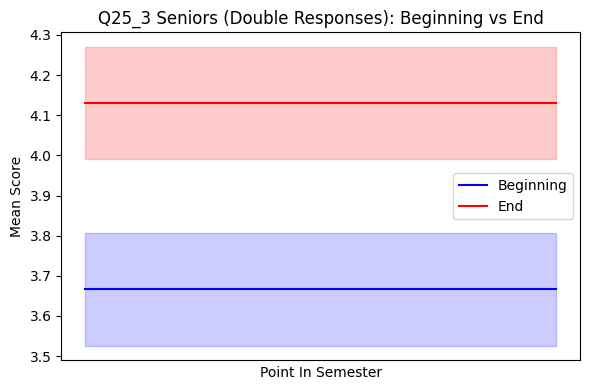

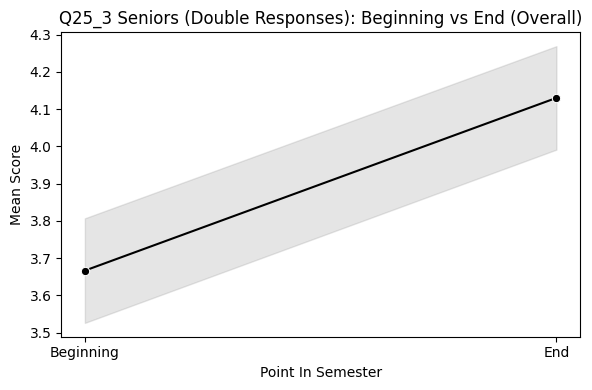

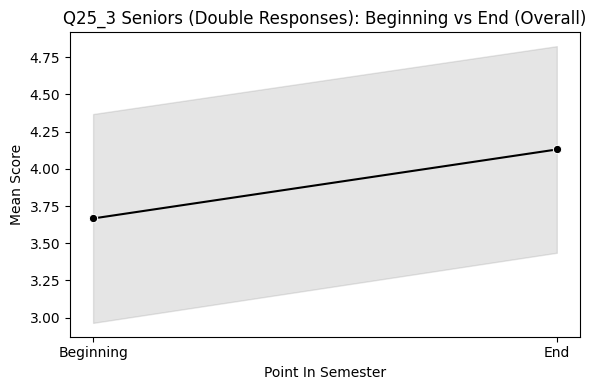

In [ ]:
# graphs and calculates Q25_3 seniors standard deviation and average
senior_beg_Q25_3 = senior_beg_Q25_3.tolist()
senior_end_Q25_3 = senior_end_Q25_3.tolist()

Q25_3_MalelBEGAvg   = average_list(senior_beg_Q25_3)
Q25_3_MaleENDAvg   = average_list(senior_end_Q25_3)

Q25_3_MaleBEGSTD = np.std(senior_beg_Q25_3)
Q25_3_MaleENDSTD = np.std(senior_end_Q25_3)

print(f"Q25_3: Beginning Avg: {Q25_3_MalelBEGAvg}")
print(f"Q25_3 End Average: {Q25_3_MaleENDAvg}")
print(Q25_3_MaleBEGSTD)
print(Q25_3_MaleENDSTD)

lineplot_overall_separate("Q25_3 Seniors (Double Responses)",
    begOverall=senior_beg_Q25_3,
    endOverall=senior_end_Q25_3, band_factor=0.20
)

lineplot_beg_to_end("Q25_3 Seniors (Double Responses)",
    begOverall=senior_beg_Q25_3,
    endOverall=senior_end_Q25_3, band_factor=0.2)

lineplot_beg_to_end("Q25_3 Seniors (Double Responses)",
    begOverall=senior_beg_Q25_3,
    endOverall=senior_end_Q25_3)

In [ ]:
# Q25_4
# mean for Q25_4
Q25_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_4"].mean()
print("Q25_4 Mean", Q25_4_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()
senior_beg_Q25_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()
sophomore_beg_Q25_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()

junior_end_Q25_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_4"].dropna()
senior_end_Q25_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_4"].dropna()
sophomore_end_Q25_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_4, senior_beg_Q25_4, sophomore_end_Q25_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_4, senior_end_Q25_4, sophomore_end_Q25_4)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_4, junior_end_Q25_4)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_4, senior_end_Q25_4)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_4, sophomore_end_Q25_4)


Q25_4 Mean Class Standing Label  B/E?     
Junior                Beginning    3.800000
                      End          3.666667
Senior                Beginning    4.041667
                      End          4.130435
Sophomore             Beginning    4.000000
                      End          3.750000
Name: Q25_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.772851805728535
P-value: 0.6794810711105298
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 2.196007215503653
P-value: 0.33353628873336777
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 8.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 259.0
P-value: 0.6984798902677032
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 33.5
P-value: 0.5114817794495524
Fail to r

In [ ]:
# Q25_5
# mean for Q25_5
Q25_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_5"].mean()
print("Q25_5 Mean", Q25_5_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()
senior_beg_Q25_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()
sophomore_beg_Q25_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()

junior_end_Q25_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_5"].dropna()
senior_end_Q25_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_5"].dropna()
sophomore_end_Q25_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_5, senior_beg_Q25_5, sophomore_end_Q25_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_5, senior_end_Q25_5, sophomore_end_Q25_5)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_5, junior_end_Q25_5)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_5, senior_end_Q25_5)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_5, sophomore_end_Q25_5)


Q25_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.400000
                      End          4.333333
Senior                Beginning    4.041667
                      End          4.130435
Sophomore             Beginning    4.142857
                      End          4.000000
Name: Q25_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.8368365921787826
P-value: 0.6580868956685964
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.4443744311419109
P-value: 0.800765434542472
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 8.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 269.5
P-value: 0.8909088766719817
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 31.0
P-value: 0.7288260098923188
Fail to r

In [ ]:
# Q25_6
# mean for Q25_6
Q25_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_6"].mean()
print("Q25_6 Mean", Q25_6_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()
senior_beg_Q25_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()
sophomore_beg_Q25_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()

junior_end_Q25_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_6"].dropna()
senior_end_Q25_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_6"].dropna()
sophomore_end_Q25_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_6, senior_beg_Q25_6, sophomore_end_Q25_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_6, senior_end_Q25_6, sophomore_end_Q25_6)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_6, junior_end_Q25_6)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_6, senior_end_Q25_6)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_6, sophomore_end_Q25_6)


Q25_6 Mean Class Standing Label  B/E?     
Junior                Beginning    2.800000
                      End          2.333333
Senior                Beginning    2.666667
                      End          2.782609
Sophomore             Beginning    2.571429
                      End          1.750000
Name: Q25_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.103310371220843
P-value: 0.12852199967418046
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 5.090659419100176
P-value: 0.07844718293092885
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 0.7570195618621564
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 264.0
P-value: 0.8007761998604845
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 42.0
P-value: 0.0999285654

In [ ]:
# Q25_7
# mean for Q25_7
Q25_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_7"].mean()
print("Q25_7 Mean", Q25_7_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()
senior_beg_Q25_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()
sophomore_beg_Q25_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()

junior_end_Q25_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_7"].dropna()
senior_end_Q25_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_7"].dropna()
sophomore_end_Q25_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_7, senior_beg_Q25_7, sophomore_end_Q25_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_7, senior_end_Q25_7, sophomore_end_Q25_7)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_7, junior_end_Q25_7)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_7, senior_end_Q25_7)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_7, sophomore_end_Q25_7)


Q25_7 Mean Class Standing Label  B/E?     
Junior                Beginning    3.200000
                      End          3.000000
Senior                Beginning    2.916667
                      End          3.347826
Sophomore             Beginning    2.857143
                      End          3.000000
Name: Q25_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.4562054507337657
P-value: 0.7960424818791849
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.7474960064804897
P-value: 0.6881503016274628
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 8.5
P-value: 0.8633332895365006
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 220.5
P-value: 0.21278148791830886
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.0
P-value: 0.947653919

In [ ]:
# Q25_8
# mean for Q25_8
Q25_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_8"].mean()
print("Q25_8 Mean", Q25_8_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()
senior_beg_Q25_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()
sophomore_beg_Q25_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()

junior_end_Q25_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_8"].dropna()
senior_end_Q25_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_8"].dropna()
sophomore_end_Q25_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_8, senior_beg_Q25_8, sophomore_end_Q25_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_8, senior_end_Q25_8, sophomore_end_Q25_8)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_8, junior_end_Q25_8)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_8, senior_end_Q25_8)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_8, sophomore_end_Q25_8)


Q25_8 Mean Class Standing Label  B/E?     
Junior                Beginning    1.400000
                      End          2.000000
Senior                Beginning    1.916667
                      End          2.260870
Sophomore             Beginning    1.714286
                      End          1.250000
Name: Q25_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.612788632326826
P-value: 0.270794698270087
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 4.868149092091661
P-value: 0.08767885225321735
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 7.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 226.5
P-value: 0.27081262034153497
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 34.0
P-value: 0.44269546155966144
Fail to 

In [ ]:
# Q25_9
# mean for Q25_9
Q25_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_9"].mean()
print("Q25_9 Mean", Q25_9_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()
senior_beg_Q25_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()
sophomore_beg_Q25_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()

junior_end_Q25_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_9"].dropna()
senior_end_Q25_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_9"].dropna()
sophomore_end_Q25_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_9, senior_beg_Q25_9, sophomore_end_Q25_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_9, senior_end_Q25_9, sophomore_end_Q25_9)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_9, junior_end_Q25_9)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_9, senior_end_Q25_9)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_9, sophomore_end_Q25_9)


Q25_9 Mean Class Standing Label  B/E?     
Junior                Beginning    3.000000
                      End          3.333333
Senior                Beginning    2.875000
                      End          3.000000
Sophomore             Beginning    2.571429
                      End          2.000000
Name: Q25_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.253641618497116
P-value: 0.11921570147423566
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 4.647085842785924
P-value: 0.09792602606717622
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 7.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 262.0
P-value: 0.7659282573108437
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 38.0
P-value: 0.23503045658642818
Fail to

In [ ]:
# Q25_10
# mean for Q25_10
Q25_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_10"].mean()
print("Q25_10 Mean", Q25_10_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()
senior_beg_Q25_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()
sophomore_beg_Q25_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()

junior_end_Q25_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_10"].dropna()
senior_end_Q25_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_10"].dropna()
sophomore_end_Q25_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_10, senior_beg_Q25_10, sophomore_end_Q25_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_10, senior_end_Q25_10, sophomore_end_Q25_10)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_10, junior_end_Q25_10)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_10, senior_end_Q25_10)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_10, sophomore_end_Q25_10)


Q25_10 Mean Class Standing Label  B/E?     
Junior                Beginning    2.000000
                      End          1.666667
Senior                Beginning    1.666667
                      End          2.304348
Sophomore             Beginning    1.857143
                      End          1.750000
Name: Q25_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.842873406193096
P-value: 0.6561035164001772
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.1542467225930686
P-value: 0.5615113106931575
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 0.7491068327779719
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 202.5
P-value: 0.08618273089030655
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.0
P-value: 1.0
Fail t

In [ ]:
# Q25_11
# mean for Q25_11
Q25_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_11"].mean()
print("Q25_11 Mean", Q25_11_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()
senior_beg_Q25_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()
sophomore_beg_Q25_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()

junior_end_Q25_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_11"].dropna()
senior_end_Q25_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_11"].dropna()
sophomore_end_Q25_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_11, senior_beg_Q25_11, sophomore_end_Q25_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_11, senior_end_Q25_11, sophomore_end_Q25_11)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_11, junior_end_Q25_11)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_11, senior_end_Q25_11)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_11, sophomore_end_Q25_11)


Q25_11 Mean Class Standing Label  B/E?     
Junior                Beginning    1.200000
                      End          1.666667
Senior                Beginning    1.708333
                      End          2.000000
Sophomore             Beginning    1.333333
                      End          1.000000
Name: Q25_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.1411845730027577
P-value: 0.20792199648809837
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 5.456805491990855
P-value: 0.06532354467842687
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 6.0
P-value: 0.6962703401140228
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 232.5
P-value: 0.29360299949403146
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.0
P-value: 0.111060

In [ ]:
# Q25_12
# mean for Q25_12
Q25_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_12"].mean()
print("Q25_12 Mean", Q25_12_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()
senior_beg_Q25_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()
sophomore_beg_Q25_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()

junior_end_Q25_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_12"].dropna()
senior_end_Q25_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_12"].dropna()
sophomore_end_Q25_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_12, senior_beg_Q25_12, sophomore_end_Q25_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_12, senior_end_Q25_12, sophomore_end_Q25_12)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_12, junior_end_Q25_12)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_12, senior_end_Q25_12)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_12, sophomore_end_Q25_12)


Q25_12 Mean Class Standing Label  B/E?     
Junior                Beginning    4.600000
                      End          4.000000
Senior                Beginning    4.166667
                      End          4.304348
Sophomore             Beginning    4.428571
                      End          4.375000
Name: Q25_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.4996506753609784
P-value: 0.47244906458442104
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.0080012077294767
P-value: 0.6041090180556206
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 12.0
P-value: 0.15822475139993508
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 254.0
P-value: 0.615622610874584
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.5
P-value: 0.891755

In [ ]:
# Q25_13
# mean for Q25_13
Q25_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_13"].mean()
print("Q25_13 Mean", Q25_13_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()
senior_beg_Q25_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()
sophomore_beg_Q25_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()

junior_end_Q25_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_13"].dropna()
senior_end_Q25_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_13"].dropna()
sophomore_end_Q25_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_13, senior_beg_Q25_13, sophomore_end_Q25_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_13, senior_end_Q25_13, sophomore_end_Q25_13)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_13, junior_end_Q25_13)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_13, senior_end_Q25_13)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_13, sophomore_end_Q25_13)


Q25_13 Mean Class Standing Label  B/E?     
Junior                Beginning    1.600000
                      End          1.666667
Senior                Beginning    1.583333
                      End          2.086957
Sophomore             Beginning    1.428571
                      End          1.000000
Name: Q25_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.0508358140600174
P-value: 0.21753013049639866
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 5.54920005143185
P-value: 0.06237441986495663
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 7.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 212.0
P-value: 0.11516986314207711
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 36.0
P-value: 0.14234504811884632
Fail

In [ ]:
# Q25_14
# mean for Q25_14
Q25_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_14"].mean()
print("Q25_14 Mean", Q25_14_result, "\n")

# creates dataframes for each class level
junior_beg_Q25_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()
senior_beg_Q25_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()
sophomore_beg_Q25_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()

junior_end_Q25_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_14"].dropna()
senior_end_Q25_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_14"].dropna()
sophomore_end_Q25_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_14"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_14, senior_beg_Q25_14, sophomore_end_Q25_14)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q25_14, senior_end_Q25_14, sophomore_end_Q25_14)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q25_14, junior_end_Q25_14)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q25_14, senior_end_Q25_14)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_14, sophomore_end_Q25_14)


Q25_14 Mean Class Standing Label  B/E?     
Junior                Beginning    3.50
                      End          4.00
Senior                Beginning    2.75
                      End          2.80
Sophomore             Beginning    3.50
                      End          2.00
Name: Q25_14, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.4303030303030346
P-value: 0.48911799739426076
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 2.4376470588235284
P-value: 0.29557770092384017
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 1.0
P-value: 0.6170750774519738
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 57.5
P-value: 0.8910966002292265
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 4.5
P-value: 0.5428024537573732
Fail to reject 

In [ ]:
# START OF QUESTION 26

In [ ]:
# Q26_1
# mean for Q26_1
Q26_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_1"].mean()
print("Q26_1 Mean", Q26_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()
senior_beg_Q26_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()
sophomore_beg_Q26_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()

junior_end_Q26_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_1"].dropna()
senior_end_Q26_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_1"].dropna()
sophomore_end_Q26_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_1, senior_beg_Q26_1, sophomore_end_Q26_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_1, senior_end_Q26_1, sophomore_end_Q26_1)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_1, junior_end_Q26_1)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_1, senior_end_Q26_1)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_1, sophomore_end_Q26_1)


Q26_1 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    3.625000
                      End          3.565217
Sophomore             Beginning    3.571429
                      End          3.250000
Name: Q26_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.0215833005120105
P-value: 0.3639307596228542
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.6658076173972365
P-value: 0.434784919239394
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 7.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 276.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 35.0
P-value: 0.4278251278478543
Fail to reject the null 

In [ ]:
# Q26_2
# mean for Q26_2
Q26_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_2"].mean()
print("Q26_2 Mean", Q26_2_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()
senior_beg_Q26_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()
sophomore_beg_Q26_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()

junior_end_Q26_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_2"].dropna()
senior_end_Q26_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_2"].dropna()
sophomore_end_Q26_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_2, senior_beg_Q26_2, sophomore_end_Q26_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_2, senior_end_Q26_2, sophomore_end_Q26_2)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_2, junior_end_Q26_2)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_2, senior_end_Q26_2)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_2, sophomore_end_Q26_2)


Q26_2 Mean Class Standing Label  B/E?     
Junior                Beginning    4.400000
                      End          3.666667
Senior                Beginning    4.000000
                      End          4.217391
Sophomore             Beginning    4.428571
                      End          4.500000
Name: Q26_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.6459354838709874
P-value: 0.16154561313314822
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 3.442753623188405
P-value: 0.17881977720486075
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 12.0
P-value: 0.16849346784241037
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 231.0
P-value: 0.29967257201740205
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 26.0
P-value: 0.841131

In [ ]:
# Q26_3
# mean for Q26_3
Q26_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_3"].mean()
print("Q26_3 Mean", Q26_3_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()
senior_beg_Q26_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()
sophomore_beg_Q26_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()

junior_end_Q26_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_3"].dropna()
senior_end_Q26_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_3"].dropna()
sophomore_end_Q26_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_3, senior_beg_Q26_3, sophomore_end_Q26_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_3, senior_end_Q26_3, sophomore_end_Q26_3)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_3, junior_end_Q26_3)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_3, senior_end_Q26_3)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_3, sophomore_end_Q26_3)


Q26_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.800000
                      End          4.333333
Senior                Beginning    4.750000
                      End          4.590909
Sophomore             Beginning    5.000000
                      End          4.750000
Name: Q26_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.15000000000001915
P-value: 0.927743486328544
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.48733671021061314
P-value: 0.7837475170288355
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 0.6962703401140228
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 310.0
P-value: 0.19222713326990493
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 35.0
P-value: 0.20239601

In [ ]:
# Q26_4
# mean for Q26_4
Q26_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_4"].mean()
print("Q26_4 Mean", Q26_4_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()
senior_beg_Q26_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()
sophomore_beg_Q26_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()

junior_end_Q26_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_4"].dropna()
senior_end_Q26_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_4"].dropna()
sophomore_end_Q26_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_4, senior_beg_Q26_4, sophomore_end_Q26_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_4, senior_end_Q26_4, sophomore_end_Q26_4)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_4, junior_end_Q26_4)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_4, senior_end_Q26_4)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_4, sophomore_end_Q26_4)


Q26_4 Mean Class Standing Label  B/E?     
Junior                Beginning    4.200000
                      End          4.000000
Senior                Beginning    4.625000
                      End          4.318182
Sophomore             Beginning    4.428571
                      End          4.625000
Name: Q26_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.01512539184954
P-value: 0.3651077746666758
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 3.0260456860626697
P-value: 0.22024321004704037
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 0.7306468631842209
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 340.5
P-value: 0.05662448072617029
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 22.5
P-value: 0.5040358664

In [ ]:
# Q26_5
# mean for Q26_5
Q26_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_5"].mean()
print("Q26_5 Mean", Q26_5_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()
senior_beg_Q26_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()
sophomore_beg_Q26_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()

junior_end_Q26_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_5"].dropna()
senior_end_Q26_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_5"].dropna()
sophomore_end_Q26_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_5, senior_beg_Q26_5, sophomore_end_Q26_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_5, senior_end_Q26_5, sophomore_end_Q26_5)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_5, junior_end_Q26_5)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_5, senior_end_Q26_5)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_5, sophomore_end_Q26_5)


Q26_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.800000
                      End          4.666667
Senior                Beginning    4.666667
                      End          4.478261
Sophomore             Beginning    4.857143
                      End          4.750000
Name: Q26_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.10095238095240884
P-value: 0.9507765659401056
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.0773865784499057
P-value: 0.5835102335305774
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 8.5
P-value: 0.8436689495519663
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 323.0
P-value: 0.2355917535809835
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 31.0
P-value: 0.676922239

In [ ]:
# Q26_6
# mean for Q26_6
Q26_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_6"].mean()
print("Q26_6 Mean", Q26_6_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()
senior_beg_Q26_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()
sophomore_beg_Q26_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()

junior_end_Q26_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_6"].dropna()
senior_end_Q26_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_6"].dropna()
sophomore_end_Q26_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_6, senior_beg_Q26_6, sophomore_end_Q26_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_6, senior_end_Q26_6, sophomore_end_Q26_6)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_6, junior_end_Q26_6)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_6, senior_end_Q26_6)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_6, sophomore_end_Q26_6)


Q26_6 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    3.750000
                      End          3.608696
Sophomore             Beginning    3.857143
                      End          3.625000
Name: Q26_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.47849206349206197
P-value: 0.7872211771441219
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.6921108087002709
P-value: 0.7074732889228259
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 7.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 303.0
P-value: 0.5578105432935714
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 33.5
P-value: 0.5267583901377431
Fail to

In [ ]:
# Q26_7
# mean for Q26_7
Q26_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_7"].mean()
print("Q26_7 Mean", Q26_7_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()
senior_beg_Q26_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()
sophomore_beg_Q26_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()

junior_end_Q26_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_7"].dropna()
senior_end_Q26_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_7"].dropna()
sophomore_end_Q26_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_7, senior_beg_Q26_7, sophomore_end_Q26_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_7, senior_end_Q26_7, sophomore_end_Q26_7)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_7, junior_end_Q26_7)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_7, senior_end_Q26_7)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_7, sophomore_end_Q26_7)


Q26_7 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    3.958333
                      End          3.826087
Sophomore             Beginning    3.857143
                      End          4.000000
Name: Q26_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.029117056856196602
P-value: 0.9855469345314208
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.7008524309274036
P-value: 0.7043878047553821
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 7.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 298.5
P-value: 0.6177657946583035
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 24.5
P-value: 0.6773916019262776
Fail t

In [ ]:
# Q26_8
# mean for Q26_8
Q26_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_8"].mean()
print("Q26_8 Mean", Q26_8_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()
senior_beg_Q26_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()
sophomore_beg_Q26_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()

junior_end_Q26_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_8"].dropna()
senior_end_Q26_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_8"].dropna()
sophomore_end_Q26_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_8, senior_beg_Q26_8, sophomore_end_Q26_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_8, senior_end_Q26_8, sophomore_end_Q26_8)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_8, junior_end_Q26_8)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_8, senior_end_Q26_8)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_8, sophomore_end_Q26_8)


Q26_8 Mean Class Standing Label  B/E?     
Junior                Beginning    3.600000
                      End          3.333333
Senior                Beginning    3.083333
                      End          3.304348
Sophomore             Beginning    3.000000
                      End          3.250000
Name: Q26_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.7595292277058965
P-value: 0.4148805573247901
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.04887291322694235
P-value: 0.9758596963781894
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 8.5
P-value: 0.8633332895365006
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 228.5
P-value: 0.28733223751396664
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 22.0
P-value: 0.46709236

In [ ]:
# Q26_9
# mean for Q26_9
Q26_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_9"].mean()
print("Q26_9 Mean", Q26_9_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()
senior_beg_Q26_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()
sophomore_beg_Q26_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()

junior_end_Q26_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_9"].dropna()
senior_end_Q26_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_9"].dropna()
sophomore_end_Q26_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_9, senior_beg_Q26_9, sophomore_end_Q26_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_9, senior_end_Q26_9, sophomore_end_Q26_9)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_9, junior_end_Q26_9)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_9, senior_end_Q26_9)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_9, sophomore_end_Q26_9)


Q26_9 Mean Class Standing Label  B/E?     
Junior                Beginning    4.400000
                      End          4.666667
Senior                Beginning    4.083333
                      End          4.130435
Sophomore             Beginning    3.714286
                      End          3.625000
Name: Q26_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.980706670311662
P-value: 0.22529303752382404
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 4.731882045088564
P-value: 0.09386093354292135
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 6.5
P-value: 0.8633332895365006
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 262.0
P-value: 0.757353530621253
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 30.0
P-value: 0.83584030428

In [ ]:
# Q26_10
# mean for Q26_10
Q26_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_10"].mean()
print("Q26_10 Mean", Q26_10_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()
senior_beg_Q26_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()
sophomore_beg_Q26_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()

junior_end_Q26_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_10"].dropna()
senior_end_Q26_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_10"].dropna()
sophomore_end_Q26_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_10, senior_beg_Q26_10, sophomore_end_Q26_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_10, senior_end_Q26_10, sophomore_end_Q26_10)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_10, junior_end_Q26_10)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_10, senior_end_Q26_10)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_10, sophomore_end_Q26_10)


Q26_10 Mean Class Standing Label  B/E?     
Junior                Beginning    3.800000
                      End          4.000000
Senior                Beginning    3.000000
                      End          3.695652
Sophomore             Beginning    3.857143
                      End          3.625000
Name: Q26_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.3118789144050362
P-value: 0.1909126171979847
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.4847250933582391
P-value: 0.7847716096294303
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 6.5
P-value: 0.8746442426975374
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 182.0
P-value: 0.0378656825543999
Reject the null hypothesis: Significant differences exists

Sophomores:
Mann-Whitney U-Value: 35.0
P-value: 0.3850664818284827
Fa

In [ ]:
# Q26_11
# mean for Q26_11
Q26_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_11"].mean()
print("Q26_11 Mean", Q26_11_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()
senior_beg_Q26_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()
sophomore_beg_Q26_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()

junior_end_Q26_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_11"].dropna()
senior_end_Q26_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_11"].dropna()
sophomore_end_Q26_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_11, senior_beg_Q26_11, sophomore_end_Q26_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_11, senior_end_Q26_11, sophomore_end_Q26_11)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_11, junior_end_Q26_11)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_11, senior_end_Q26_11)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_11, sophomore_end_Q26_11)


Q26_11 Mean Class Standing Label  B/E?     
Junior                Beginning    3.200000
                      End          3.333333
Senior                Beginning    2.916667
                      End          3.173913
Sophomore             Beginning    3.285714
                      End          3.250000
Name: Q26_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.7741420873511288
P-value: 0.6790428515129252
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.06051940407090013
P-value: 0.9701935395912403
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 6.0
P-value: 0.7326782613757068
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 237.5
P-value: 0.3827150598404784
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.0
P-value: 1.0
Fail 

In [ ]:
# Q26_12
# mean for Q26_12
Q26_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_12"].mean()
print("Q26_12 Mean", Q26_12_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()
senior_beg_Q26_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()
sophomore_beg_Q26_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()

junior_end_Q26_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_12"].dropna()
senior_end_Q26_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_12"].dropna()
sophomore_end_Q26_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_12, senior_beg_Q26_12, sophomore_end_Q26_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_12, senior_end_Q26_12, sophomore_end_Q26_12)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_12, junior_end_Q26_12)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_12, senior_end_Q26_12)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_12, sophomore_end_Q26_12)


Q26_12 Mean Class Standing Label  B/E?     
Junior                Beginning    4.800000
                      End          4.333333
Senior                Beginning    4.708333
                      End          4.565217
Sophomore             Beginning    4.857143
                      End          4.875000
Name: Q26_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.33750000000001246
P-value: 0.8447200570049782
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 1.9399999999999928
P-value: 0.3790830381034002
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 0.6962703401140228
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 320.0
P-value: 0.24759610784192976
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.5
P-value: 1.0
Fail

In [ ]:
# Q26_13
# mean for Q26_13
Q26_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_13"].mean()
print("Q26_13 Mean", Q26_13_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()
senior_beg_Q26_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()
sophomore_beg_Q26_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()

junior_end_Q26_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_13"].dropna()
senior_end_Q26_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_13"].dropna()
sophomore_end_Q26_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_13, senior_beg_Q26_13, sophomore_end_Q26_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_13, senior_end_Q26_13, sophomore_end_Q26_13)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_13, junior_end_Q26_13)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_13, senior_end_Q26_13)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_13, sophomore_end_Q26_13)


Q26_13 Mean Class Standing Label  B/E?     
Junior                Beginning    3.400000
                      End          3.333333
Senior                Beginning    2.958333
                      End          2.869565
Sophomore             Beginning    3.571429
                      End          3.625000
Name: Q26_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.9861561433447283
P-value: 0.22468000890756035
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 4.028826992753625
P-value: 0.13339861920026136
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 7.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 282.5
P-value: 0.8891648910970511
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.0
P-value: 1.0
Fail to reject the n

In [ ]:
# Q26_14
# mean for Q26_14
Q26_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_14"].mean()
print("Q26_14 Mean", Q26_14_result, "\n")

# creates dataframes for each class level
junior_beg_Q26_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()
senior_beg_Q26_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()
sophomore_beg_Q26_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()

junior_end_Q26_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_14"].dropna()
senior_end_Q26_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_14"].dropna()
sophomore_end_Q26_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_14"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_14, senior_beg_Q26_14, sophomore_end_Q26_14)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q26_14, senior_end_Q26_14, sophomore_end_Q26_14)

# U-Tests for Juniors
print("Juniors:")
UTest(junior_beg_Q26_14, junior_end_Q26_14)

# U-Tests for Seniors
print("Seniors:")
UTest(senior_beg_Q26_14, senior_end_Q26_14)

# U-Tests for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_14, sophomore_end_Q26_14)


Q26_14 Mean Class Standing Label  B/E?     
Junior                Beginning    5.000000
                      End               NaN
Senior                Beginning    3.222222
                      End          2.875000
Sophomore             Beginning    3.333333
                      End          1.000000
Name: Q26_14, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.921497584541067
P-value: 0.08537100188168197
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: nan
P-value: nan
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 37.5
P-value: 0.9163568874302955
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 3.0
P-value: 0.3457785861511603
Fail to reject the null hypothesis: No

/var/folders/zw/8__r3v0n6hqgbqxwp15_p9wh0000gn/T/ipykernel_43200/2475549136.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_value = kruskal(data1, data2, *args)
